<a href="https://colab.research.google.com/github/fraserstark/Coursera_TensorFlow_Labs/blob/master/Convolutional%20Neural%20Networks/MNIST_Sign_Language_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [3]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [4]:
def get_data(filename):

    with open(filename) as training_file:
        labels = []
        images = []
        
        reader = csv.reader(training_file, delimiter=',')
        
        next(reader) # Skip header
        
        for row in reader:
            l = row[0]      # First column is label data
            img = row[1:]   # 1:785 is the image data
            
            labels.append(l)
            img = np.array(img).reshape((28, 28))   # Reshape image to 28x28
            images.append(img)
        
        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
# Add another dimension to the data

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
     rescale = 1./255,
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale = 1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
                                    
     # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
 
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')]
    )

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              epochs=15,
                              steps_per_epoch= len(training_images) / 32,
                              validation_data = validation_datagen.flow(testing_images, testing_labels, batch_size=32), 
                              verbose = 1)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
858/857 [==============================] - 61s 71ms/step - loss: 2.8510 - accuracy: 0.1396 - val_loss: 2.0767 - val_accuracy: 0.3360
Epoch 2/15
858/857 [==============================] - 63s 74ms/step - loss: 2.2070 - accuracy: 0.3035 - val_loss: 1.9986 - val_accuracy: 0.3116
Epoch 3/15
858/857 [==============================] - 60s 70ms/step - loss: 1.8760 - accuracy: 0.3980 - val_loss: 1.4943 - val_accuracy: 0.4682
Epoch 4/15
858/857 [==============================] - 62s 72ms/step - loss: 1.6512 - accuracy: 0.4648 - val_loss: 1.2183 - val_accuracy: 0.5620
Epoch 5/15
858/857 [==============================] - 63s 74ms/step - loss: 1.4965 - accuracy: 0.5121 - val_loss: 0.8991 - val_accuracy: 0.6718
Epoch 6/15
858/857 [==============================] - 62s 73ms/step - loss: 1.3748 - accuracy: 0.5499 - val_loss: 0.7925 - val_accuracy: 0.7154
Epoch 7/15
858/857 [==============================] - 61s 71

[6.92426086682151, 0.56609035]

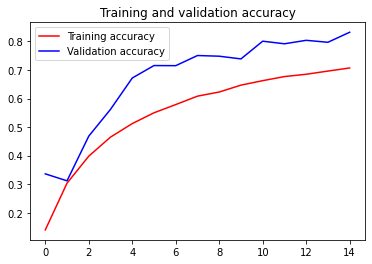

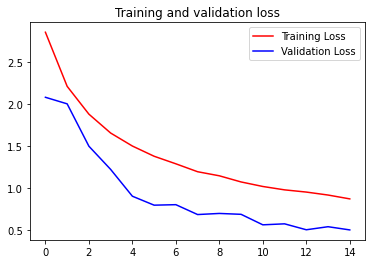

In [7]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()